<a href="https://colab.research.google.com/github/pratikasarkar/Unsupervised-Learning/blob/master/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Please UpVote if you like the work!!!***

# **Principal Component Analysis (PCA)**
### It is a data transformation technique. The final objective of PCA is DIMENSIONALITY REDUCTION.
The general myth, that the idea of dimensionality reduction means that PCA will drop some of the weak features, is WRONG.

Consider we have some features which are highly significant in our data, out of these some are highly correlated to out target variable and some a weakly correlated. There is a chance that those weakly correlated features have high correlation among themselves, eventually adding redundancy and multicolliearity to our models. This multicolliearity effect is the NOISE in PCA. So the intention of PCA is to reduce that noise.

***Lets have a look at it into with an example more intuitively.***

Consider we have 15 features in a dataset. Out these there are 2 features which are highly correlated to each other.

So if we plot a histogram of these 2 features, a majority of the part will be overlapping as they are highly correlated. You can see the plot below :

**FIGURE 1 :**   
![alt text](https://i.ibb.co/k1TRbNv/Q9GDn.png)

The important information which these 2 features will provide us will be those data points which are not redundant/non overlapping and lie at the extreme ends of the histograms as shown in the plot below:

**FIGURE 2 :**

![alt text](https://i.ibb.co/7VR6ZNy/Q9GDn1.png)

This is the information which we cannot afford to lose because the information in these records are responsible for significantly differentiating the 2 features from each other.

On the other hand, there is a lot of redundant/overlapping data due to high correlation in these 2 features which gives rise to multicollinearity. The following plot represents this redundant data : 

**FIGURE 3 :**

![alt text](https://i.ibb.co/nnPmXYr/Q9GDn2.png)

This redundant data causes multicolliearity. So even if we lose some data from this part, there won't be much information loss.

So we can say that we are not sacrificing the feature but we are sacrificing the information content at the low frequency/low variance zone.

*Consider an example of predicting a cancerous patient. We can afford to lose some information from a healthy patient(eg. normal bp range/normal rbc-wbc level) as it will not affect our prediction result to an extreme level. But on the other hand we can't affort to lose the information from a cancerous patient(eg. abnormal bp range/abnormal rbc-wbc level), bcoz it could lead to a loss of extensive information and our model could behave unexpectedly.*

In [5]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/iris.csv')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df2 = df.drop('species',axis = 1)

In [9]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df2_scaled = ss.fit_transform(df2)
df2

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


np.cov calculates the covariance row-wise. So we transpose the dataset to represent the features as rows.

In [14]:
cov_matrix = np.cov(df2_scaled.T)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


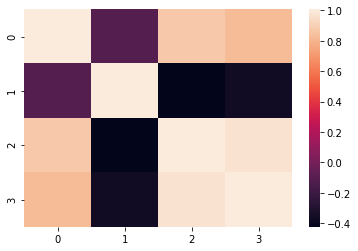

In [15]:
import seaborn as sns
sns.heatmap(cov_matrix)

In [19]:
eigen_values,eigen_vectors = np.linalg.eig(cov_matrix)
print('Eigen Values\n',eigen_values)
print()
print('Eigen Vectors\n',eigen_vectors)

Eigen Values
 [2.93035378 0.92740362 0.14834223 0.02074601]

Eigen Vectors
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Eigen Vectors here are the principal components(PCs). We need to sort these eigen vectors in descending order w.r.t their corresponding eigen values.

In [57]:
sorted_eig_vals = pd.Series(eigen_values).sort_values(ascending =False)
pcs = eigen_vectors[:,list(sorted_eig_vals.index)].T
pcs

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]])

The actual representation of principal components will be the transpose of eigen vectors as follows:

PC1 : [ 0.52237162, -0.26335492,  0.58125401,  0.56561105]

PC2 : [-0.37231836, -0.92555649, -0.02109478, -0.06541577]

PC3 : [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]

PC4 : [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]

In [55]:
tot = np.sum(sorted_eig_vals)
var_exp = [(i/tot) * 100 for i in sorted_eig_vals]
cum_var_exp = np.cumsum(var_exp)
print('Explained variance by each principal component : \n [PC1,PC2,PC3,PC4]\n',var_exp)
print()
print('Cumulative explained variance : ',cum_var_exp)

Explained variance by each principal component : 
 [PC1,PC2,PC3,PC4]
 [72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]

Cumulative explained variance :  [ 72.77045209  95.80097536  99.48480732 100.        ]


So as we can see that most of the variance in data has been explained by the 1st two principal components that is about 96 percent.

So most of the information essential to differentiate the feature from each other has been captured by the 1st two PCs.

Overdoing PCA is not advisable. Reducing high number of PCs could lead to introducing bias error in our model. The least percentage advisable is around 90 percent.

In [80]:
selected_pcs = pcs[:2]
selected_pcs

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577]])

Now to transform our data to a data which has its dimensionality reduced, we need to do a dot product between our originally scaled data and the PCs.

This would mean that we are considering using only the important information from the high variance zone(**FIGURE 2**) and eliminating all the redundant noise/less important information by elimininating the PCs which explain the low variance region(FIGURE 3).

Our scaled data is 150x4 and our selected PCs are 2X4. So we would need to transpose our selected PCs and to do the dot product.

In [81]:
tranps_select_pcs = selected_pcs.T
tranps_select_pcs

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [82]:
projected_data = np.dot(df2_scaled,tranps_select_pcs)
projected_data.shape

(150, 2)

# Using Kmeans on the transformed data using PCA

In [83]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3,n_init=15,random_state=2)
kmeans.fit(projected_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [84]:
kmeans.inertia_

116.10924021401527

# Kmeans on original data

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3,n_init=15,random_state=2)
kmeans.fit(df2_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [86]:
kmeans.inertia_

140.96581663074699

As we can see that the inertia value on transformed data using PCA is less as compared to the inertia value on the original data. Thus it gives us an improved performance after transforming the data using PCA.

To know more about why we compare inertia values for comparing models, please do checkout my kernel "Kmeans Clustering Guide" : https://www.kaggle.com/pratikasarkar/kmeans-clustering-guide

***Please UpVote if you like the work!!!***